In [11]:
import pandas 
import numpy
import matplotlib.pyplot as plt
#import seaborn
#import statsmodels.api as sm

In [15]:
data=pandas.read_csv(r'boston.csv', low_memory=False)

# data is a dataframa from pandas 

print(len(data))
print(len(data.columns))

506
14


In [16]:
print(data.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [17]:
type(data)

pandas.core.frame.DataFrame

In [20]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [29]:
#Select specific columns from the bigger data set 
dfb=pandas.DataFrame(data, columns=['AGE', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'CRIM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'])

In [30]:
dfb.head() 

,AGE,ZN,INDUS,CHAS,NOX,RM,CRIM,RAD,TAX,PTRATIO,LSTAT,MEDV
0,65.2,18.0,2.31,0,0.538,6.575,0.00632,1,296,15.3,4.98,24.0
1,78.9,0.0,7.07,0,0.469,6.421,0.02731,2,242,17.8,9.14,21.6
2,61.1,0.0,7.07,0,0.469,7.185,0.02729,2,242,17.8,4.03,34.7
3,45.8,0.0,2.18,0,0.458,6.998,0.03237,3,222,18.7,2.94,33.4
4,54.2,0.0,2.18,0,0.458,7.147,0.06905,3,222,18.7,5.33,36.2


In [31]:
#convert string to numeric
rad_count = dfb['RAD'].value_counts() #sort=False
print(rad_count)

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64


In [32]:
dfb['RAD'] = pandas.to_numeric(dfb['RAD'])
rad_count = dfb['RAD'].value_counts(sort=False)
print(rad_count)

#if numeric data 
#first, data['RAD']=pandas.to_numeric(data['RAD'])

1      20
2      24
3      38
4     110
5     115
6      26
7      17
8      24
24    132
Name: RAD, dtype: int64


In [33]:
#count for CHAS
chas_count = dfb['CHAS'].value_counts(sort=False, normalize=True)
print('Frequency Distribution:', chas_count, sep='\n')

Frequency Distribution:
0    0.93083
1    0.06917
Name: CHAS, dtype: float64


In [36]:
# Key Error
chas_count = dfb['Chas'].value_counts(sort=False)

In [37]:
# count for CHAS using groupby function
x=data.groupby('CHAS').size()
# x=data.groupby('CHAS').size()*100/len(data)
print(x)

CHAS
0    471
1     35
dtype: int64


In [38]:
import seaborn

Text(0.5, 1.0, 'Number of houses next to Charles River')

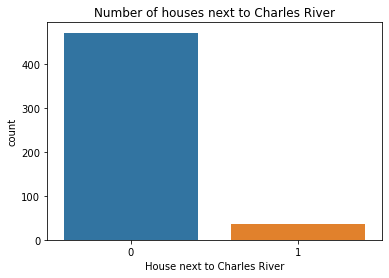

In [40]:
%matplotlib inline
seaborn.countplot(x='CHAS', data=dfb)
plt.xlabel("House next to Charles River")
plt.title("Number of houses next to Charles River")

Text(0.5, 1.0, 'Distribution Plot for MEDV')

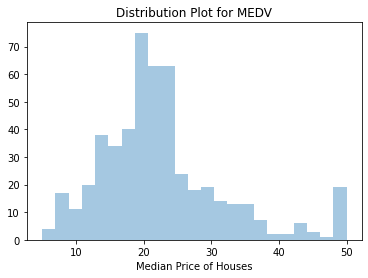

In [46]:
# seaborn.distplot(dfb['MEDV'])
seaborn.distplot(dfb['MEDV'].dropna(), kde=False)
plt.xlabel("Median Price of Houses")
plt.title("Distribution Plot for MEDV")

In [ ]:
dfb['MEDV'].describe()

In [ ]:
dfb['MEDV'].mean()
#other descriptive stats as well

In [42]:
dfb['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [47]:
dfb['CHAS'].describe()

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

Text(0.5, 1.0, 'Number of houses next to Charles River')

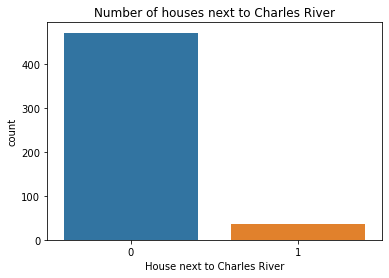

In [48]:
# Is there a problem in the descriptive stats above?
# knowledge of basic stats is essential in figuring out appropriate desc. measures

%matplotlib inline
seaborn.countplot(x='CHAS', data=dfb)
plt.xlabel("House next to Charles River")
plt.title("Number of houses next to Charles River")

In [50]:
dfb['CHAS'].describe()

count       506
unique        2
top       Close
freq        471
Name: CHAS, dtype: object

In [ ]:
# plot for two variables - one on X and the other on Y

seaborn.factorplot(x='CHAS', y='MEDV', data=dfb, kind='bar', ci=None) # ci refers to error
plt.xlabel("Proximity of Charles River")
plt.ylabel("Median House Value")

In [49]:
dfb['CHAS']=dfb['CHAS'].astype('category')
dfb['CHAS']=dfb['CHAS'].cat.rename_categories(["Close", "Far"])

In [ ]:
# General Workflow
# Get the data (from csv, web etc)
# Get a sense of the data by
    # examine few rows (df.head(), for example)
    # data cleaning/manipulation (missing data, data from multiple sources)
    # figure out the level of the variable (categorical or numeric)
    # Sometimes you may need to assign some variables to be explicitly numeric
        # ... while others as categorical (for example, CHAS above)
    # get them done in the beginning before starting data analysis
        # we did  not do this here for pedagogical reasons
    # pandas is very good for the steps above; panda, scipy and viz. packages for steps below
    # What is/ are your target variable? What are your predictors?
    # Understand descriptive stats, distributions etc (somrtimes using visualizations)
    # choose a stats model; run the model; evaluate the model (use scipy package; or even R after)

Text(0.5, 1.0, 'Scatterplot to show the relationship between Pollution and House Price')

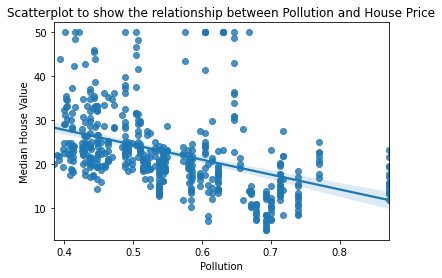

In [51]:
# regplot (2 variables)

seaborn.regplot(x='NOX', y='MEDV', data=dfb, fit_reg=True) #ci refers to error bars
plt.xlabel("Pollution")
plt.ylabel('Median House Value')
plt.title("Scatterplot to show the relationship between Pollution and House Price")

In [ ]:
# stats knowledge - look at the value around y=50; implication?

In [52]:
dfb.corr()

,AGE,ZN,INDUS,NOX,RM,CRIM,RAD,TAX,PTRATIO,LSTAT,MEDV
AGE,1.000000,-0.569537,0.644779,0.731470,-0.240265,0.352734,0.456022,0.506456,0.261515,0.602339,-0.376955
ZN,-0.569537,1.000000,-0.533828,-0.516604,0.311991,-0.200469,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.644779,-0.533828,1.000000,0.763651,-0.391676,0.406583,0.595129,0.720760,0.383248,0.603800,-0.483725
NOX,0.731470,-0.516604,0.763651,1.000000,-0.302188,0.420972,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.240265,0.311991,-0.391676,-0.302188,1.000000,-0.219247,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
CRIM,0.352734,-0.200469,0.406583,0.420972,-0.219247,1.000000,0.625505,0.582764,0.289946,0.455621,-0.388305
RAD,0.456022,-0.311948,0.595129,0.611441,-0.209847,0.625505,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.506456,-0.314563,0.720760,0.668023,-0.292048,0.582764,0.910228,1.000000,0.460853,0.543993,-0.468536
PTRATIO,0.261515,-0.391679,0.383248,0.188933,-0.355501,0.289946,0.464741,0.460853,1.000000,0.374044,-0.507787
LSTAT,0.602339,-0.412995,0.603800,0.590879,-0.613808,0.455621,0.488676,0.543993,0.374044,1.000000,-0.737663


In [54]:
# stats component from scipy is now a separate package
# scipy is a broader package for doing a range of computations
# people typically use python for data manipulation
# use R/stats packages for data analysis; however, python for programming chops

import statsmodels.api as sm

In [55]:
result=sm.OLS(dfb['MEDV'], dfb['RM']).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Fri, 06 May 2022   Prob (F-statistic):                   3.74e-256
Time:                        17:46:28   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# other datasets
# https://vincentarelbundock.github.io/Rdatasets/datasets.html
# http://statweb.stanfor.edu/-sabatti/data.html

From this data analysis workflow individual assignment I learned a ton of things, 

1) I learned how to select specific columns from a larger dataset, this is really useful as I will perform this maneuver alot.

2) I learned how to convert a string to a number in order to make analysis easier. Sometimes data will not be in the best format to work with and so this skill is essential.

3) Using GroupBy I can count for a specific variable.

4) I learned how to plot for two variables using matplotlib, and famialiarized myself further with the seaborn library.

5) I learned scipy is a broader package for doing a range of computations,people typically use python for data manipulation

Overall, I feel a lot more confident with analyzing data as a result of this assignment and can see myself talking about this assignment at an interview or at the workplace with a colleague. Although I was following a youtube video at times I still found it difficult to follow along due to the complexity of the concepts being demonstrated. I will certainly be reviewing this code in the future.